# Linear Regression

Despite knowing that Linear Regresion wouldn't work in this case, a basic linear regression model is used in order to get some baseline predictions. We fit the model to use mean squared log error as a reference to check how good the other models are performing. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
df_bike_trips_hourly = pd.read_parquet('../../data/bike_trips_hourly.parquet')
df_bike_trips_hourly.head()

,index,starting_trips,ending_trips,min_temp,precip,hour,month,is_weekday,is_holiday
level_0,,,,,,,,,
0,2016-01-01 00:00:00,26.0,17.0,6.7,0.0,0,1,1,1
1,2016-01-01 01:00:00,39.0,32.0,7.2,0.0,1,1,1,1
2,2016-01-01 02:00:00,33.0,37.0,6.7,0.0,2,1,1,1
3,2016-01-01 03:00:00,6.0,10.0,6.7,0.0,3,1,1,1
4,2016-01-01 04:00:00,1.0,1.0,6.1,0.0,4,1,1,1


In [12]:
#drop date, because it is already in the index
df_bike_trips_hourly.drop(['ending_trips'] , axis=1, inplace=True)
#drop ending trips.. would be confusing I suppose..? 

df_bike_trips_hourly.head()

,index,starting_trips,min_temp,precip,hour,month,is_weekday,is_holiday
level_0,,,,,,,,
0,2016-01-01 00:00:00,26.0,6.7,0.0,0,1,1,1
1,2016-01-01 01:00:00,39.0,7.2,0.0,1,1,1,1
2,2016-01-01 02:00:00,33.0,6.7,0.0,2,1,1,1
3,2016-01-01 03:00:00,6.0,6.7,0.0,3,1,1,1
4,2016-01-01 04:00:00,1.0,6.1,0.0,4,1,1,1


## Define X and Y

In [13]:
X = df_bike_trips_hourly[['min_temp', 'precip', 'hour', 'month', 'is_weekday']]
Y = df_bike_trips_hourly['starting_trips']
# Try standardscaler or reshape function

## Train the model on the training set

In [14]:
#random_state 0, so it stays the same verytime we run it
#30-70 split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [15]:
regression = LinearRegression()  
regression.fit(X_train, Y_train)

LinearRegression()

## Predict the test set results

In [16]:
Y_pred = regression.predict(X_test)
print(Y_pred)

[  4.59079572  79.80614427  15.05892726 ...  49.67378714  50.21285438
 108.06568978]


## Evaluate the model

In [17]:
r2_score(Y_test, Y_pred)

0.254229734787893

## Plot the results

Text(0, 0.5, 'Predicted')

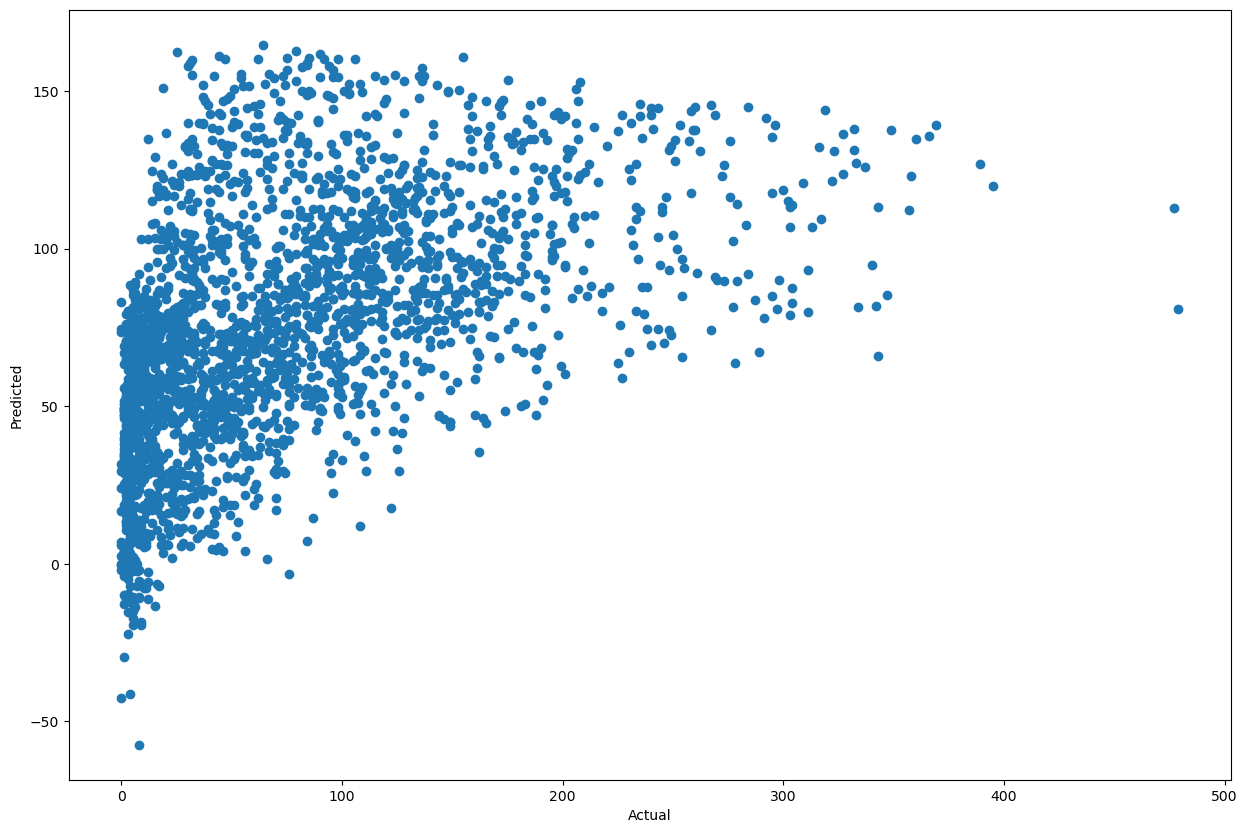

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
#To Do the line as visualization